Image Size: 496x325, Channels: 3
Total Pixels: 161200
Black Pixel Area: 75323


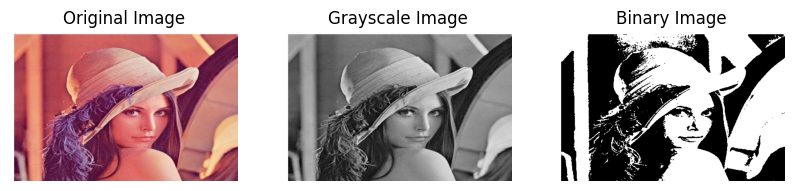

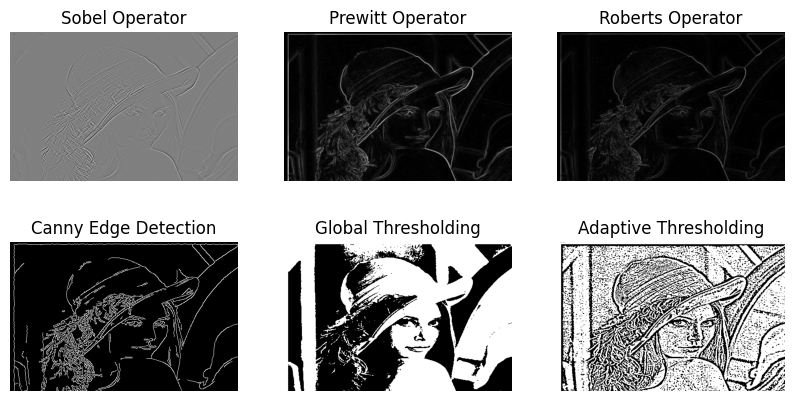

In [ ]:
#Anshika Gupta: E22CSEU0921: Batch-31
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

def task_1(image_path):
    # 1. Read the image
    image = cv2.imread(image_path)

    # 2. Display the image
    plt.figure(figsize=(10,5))
    plt.subplot(2,3,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite('image_rgb.jpg', image_rgb)

    # 3. Extract Image size
    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")

    # 4. Calculate image pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # 5. Convert RGB to Grayscale
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    cv2.imwrite('image_gray.jpg', gray)
    plt.subplot(2,3,2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # 6. Convert Grayscale to Binary using thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('image_binary.jpg', binary)
    plt.subplot(2,3,3)
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    # Count black pixel area
    black_pixel_area = np.sum(binary == 0)
    print(f"Black Pixel Area: {black_pixel_area}")

    plt.show()

def task_2(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge Detection
    sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    prewitt = filters.prewitt(image)
    roberts = filters.roberts(image)
    canny = cv2.Canny(image, 100, 200)

    cv2.imwrite('sobel.jpg', sobel)
    cv2.imwrite('prewitt.jpg', prewitt * 255)
    cv2.imwrite('roberts.jpg', roberts * 255)
    cv2.imwrite('canny.jpg', canny)

    plt.figure(figsize=(10,5))
    plt.subplot(2,3,1)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Operator')
    plt.axis('off')

    plt.subplot(2,3,2)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt Operator')
    plt.axis('off')

    plt.subplot(2,3,3)
    plt.imshow(roberts, cmap='gray')
    plt.title('Roberts Operator')
    plt.axis('off')

    plt.subplot(2,3,4)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    # Image Segmentation
    _, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Watershed segmentation
    ret, markers = cv2.connectedComponents(global_thresh)
    markers = markers + 1
    markers[global_thresh == 255] = 0
    watershed_image = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)

    cv2.imwrite('global_threshold.jpg', global_thresh)
    cv2.imwrite('adaptive_threshold.jpg', adaptive_thresh)
    cv2.imwrite('watershed.jpg', watershed_image.astype(np.uint8))

    plt.subplot(2,3,5)
    plt.imshow(global_thresh, cmap='gray')
    plt.title('Global Thresholding')
    plt.axis('off')

    plt.subplot(2,3,6)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.show()

# Example usage:
task_1('input.jpg')
task_2('input.jpg')

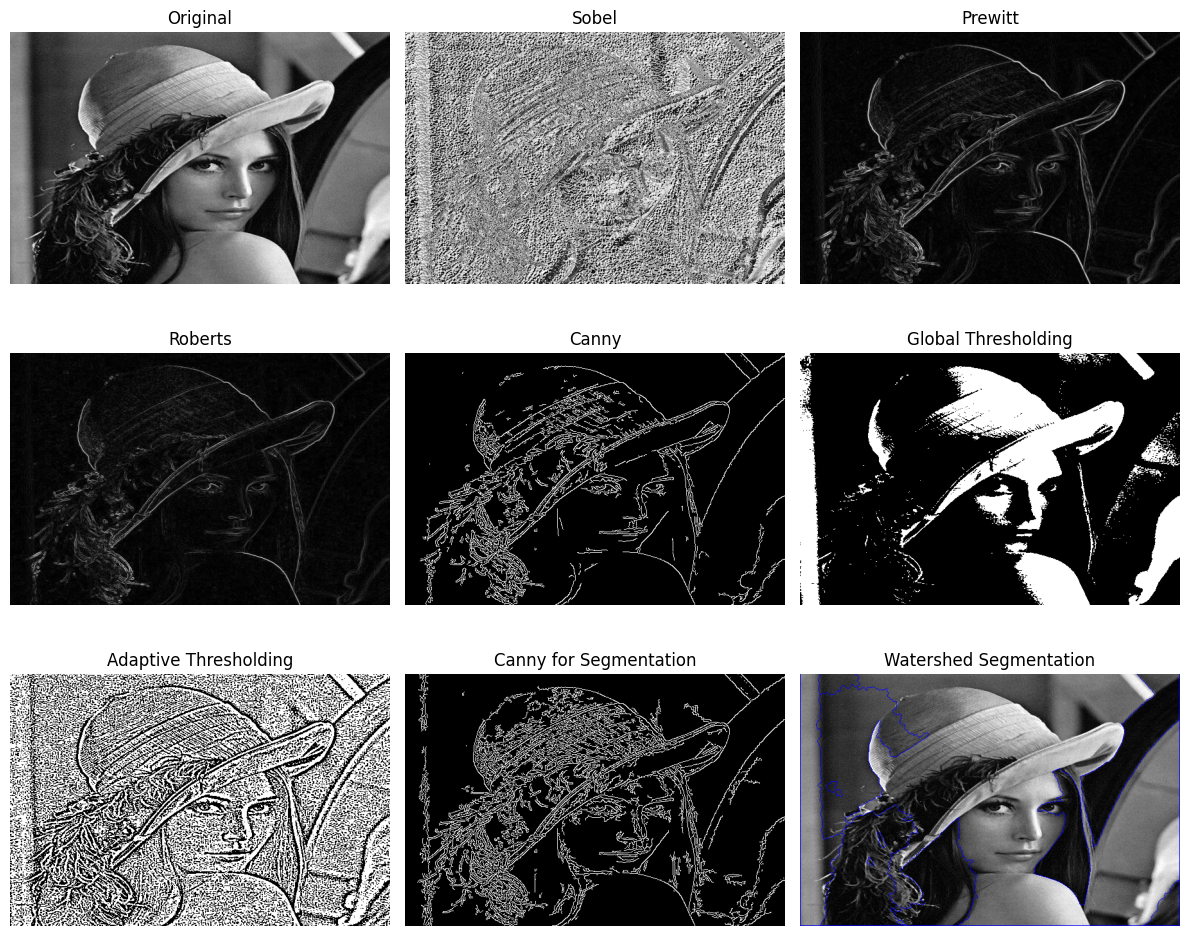

In [ ]:
#Anshika Gupta: E22CSEU0921: Batch-31
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from scipy.ndimage import sobel

# Load the image in grayscale
image_path = "image.png"  # Change path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found!")
    exit()

# **1. Edge Detection**
sobel_x = sobel(image, axis=0)
sobel_y = sobel(image, axis=1)
sobel_combined = np.hypot(sobel_x, sobel_y)  # Combine Sobel X and Y

prewitt_edges = prewitt(image)  # Prewitt Edge Detection
roberts_edges = roberts(image)  # Roberts Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # **Canny Edge Detection (Basic)**

# **2. Image Segmentation**
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # Global Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)  # Adaptive Thresholding

# **3. Edge Detection for Segmentation (Canny Edge Detector)**
canny_segment = cv2.Canny(image, 50, 150)  # **Used for segmentation purposes**

# **4. Watershed Segmentation**
image_color = cv2.imread(image_path)  # Load color image for Watershed
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

# **Display Results**
titles = ["Original", "Sobel", "Prewitt", "Roberts", "Canny",
          "Global Thresholding", "Adaptive Thresholding", "Canny for Segmentation", "Watershed Segmentation"]

images = [image, sobel_combined, prewitt_edges, roberts_edges, canny_edges,
          global_thresh, adaptive_thresh, canny_segment, image_color]

plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    if i == 8:  # Display Watershed in color
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
